In [1]:
#Import modules

import matplotlib.pyplot as plt
from matplotlib import cm, patches
import matplotlib 
import numpy as np
from astropy.io import fits
from astropy import wcs
from astropy.coordinates import SkyCoord
import reproject as r
import os as os
#import colorce
import scipy as sp
import lic
from matplotlib.colors import SymLogNorm,LogNorm
#import seaborn as seb
import scipy.stats as st
import matplotlib.ticker as ticker
from reproject import (reproject_interp, reproject_exact)

ltgreen="#33FF99"

polthresh=3 #sn for polarization cut

In [3]:
Chandra1= '/users/nsalem/image files/GC_GB_fs23.fits'
MK1= '/users/nsalem/image files/MeerKAT_Galactic_Centre_1284MHz-StokesI.fits'
Spitzer1= '/users/nsalem/image files/GLM_00000+0000_mosaic_I4.fits'

MK = fits.open(MK1)[0]
w4 = wcs.WCS(MK.header, naxis=2)

Spitzer = fits.open(Spitzer1)[0]
w5 = wcs.WCS(Spitzer.header)

In [4]:
Chandra = fits.open(Chandra1)[0]
Chandra.header['CTYPE1'] = "GLON-TAN"
Chandra.header['CTYPE2'] = "GLAT-TAN"
Chandra.writeto('GC_GB_fs23.fits', overwrite=True)

In [5]:
#make sure to run this cell AFTER the cell above
Chandra1= '/users/nsalem/image files/GC_GB_fs23.fits'
Chandra = fits.open(Chandra1)[0]
w2=wcs.WCS(Chandra.header)

In [6]:
rotated=fits.open('Merged_Full_Polarization_Rotated.fits')
w_fixed=wcs.WCS(rotated[0].header)

In [7]:
Spitzer_fixed,_ = reproject_interp((Spitzer.data,w5),rotated[0].header)
Chandra_fixed,_ = reproject_interp((Chandra.data,w2),rotated[0].header)
MK_fixed,_ = reproject_interp((MK.data,w4),rotated[0].header)

In [8]:
from astropy.visualization import make_lupton_rgb

In [11]:
#colorscaling meerkat img
MK_fixed3 = MK_fixed+0.001
MK_fixed2 = np.log(MK_fixed3)
MK_fixed1 = MK_fixed2-np.nanmin(MK_fixed2)
MK_fixed4 = MK_fixed1*300 - 600

In [12]:
#colorscaling chandra img
Chandra_fixed1 = Chandra_fixed - np.nanmin(Chandra_fixed)


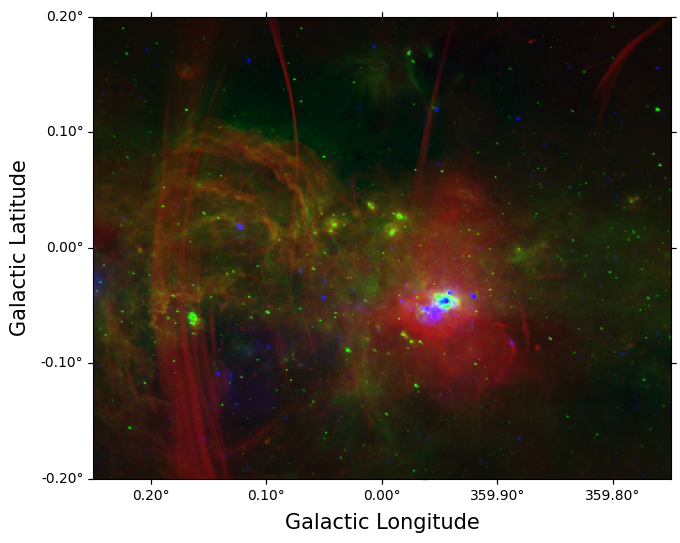

In [15]:
#Lower Left corner of final map
ll=SkyCoord('0.25deg','-0.20deg')
#upper right corner of final map
ur=SkyCoord('-0.25deg','.20deg')
x1,y1=w_fixed.wcs_world2pix(ll.ra.deg,ll.dec.deg,0)
x2,y2=w_fixed.wcs_world2pix(ur.ra.deg,ur.dec.deg,0)

forc=np.float_()
g = np.array(Spitzer_fixed,forc)
b = np.array(Chandra_fixed1,forc)
r = np.array(MK_fixed4,forc)

saga = SkyCoord('359.94deg', '-0.05deg')
sick = SkyCoord('0.17deg', '-0.04deg')
arch = SkyCoord('0.12deg', '0.10deg')
arc = SkyCoord('0.16deg', '-0.15deg')

plt.figure(figsize=(8,6))
ax=plt.axes(projection=w_fixed)

ra=ax.coords[0]
dec=ax.coords[1]
ra.set_major_formatter('d.dd')
dec.set_major_formatter('d.dd')
ax.set_xlabel('Galactic Longitude', fontsize=15)
ax.set_ylabel('Galactic Latitude', fontsize=15)
x1,y1=w_fixed.wcs_world2pix(ll.ra.deg,ll.dec.deg,0)
x2,y2=w_fixed.wcs_world2pix(ur.ra.deg,ur.dec.deg,0)
sagax,sagay=w_fixed.wcs_world2pix(saga.ra.deg,saga.dec.deg,0)
sickx,sicky=w_fixed.wcs_world2pix(sick.ra.deg,sick.dec.deg,0)
archx, archy=w_fixed.wcs_world2pix(arch.ra.deg,arch.dec.deg,0)
arcx, arcy=w_fixed.wcs_world2pix(arc.ra.deg,arc.dec.deg,0)

ax.set_xlim([x1,x2])
ax.set_ylim([y1,y2])

rgb_default = make_lupton_rgb(r*0.45,g*0.4,b*10,Q=0.001,stretch=1000)


ax.imshow(rgb_default, origin='lower')

#annotations of prominent cmz features
ax.annotate('Sagittarius A$^*$', xy=(sagax,sagay),xytext=(1070,450), fontsize=11, arrowprops=dict(arrowstyle='-|>', linewidth=1.0, color='white'), color='white')
ax.annotate('Sickle', xy=(sickx,sicky),xytext=(850,460), fontsize=11, arrowprops=dict(arrowstyle='-|>', linewidth=1.0, color='white'), color='white')
ax.annotate('Arches', xy=(archx,archy),xytext=(930,630), fontsize=11, arrowprops=dict(arrowstyle='-|>', linewidth=1.0, color='white'), color='white')
ax.annotate('Radio Arc', xy=(arcx,arcy),xytext=(940,420), fontsize=11, arrowprops=dict(arrowstyle='-|>', linewidth=1.0, color='white'), color='white')
ax.text(840, 668, 'Red: 20cm (MeerKAT)', fontsize=10, color='red')
ax.text(954, 668, r'Green: 8$\mu$m (Spitzer)', fontsize=10, color='limegreen')
ax.text(1070, 668, 'Blue: 0.25nm (Chandra)', fontsize=10, color='royalblue')

#outline G0.00+0.15 cloud
# plt.plot((994.6597453242543, 1073.7810967407888),(584.7885071335726,584.7885071335726),color='white', linestyle='dashed')
# plt.plot((994.6597453242543, 994.6597453242543),(584.7885071335726,663.9105186810459),color='white', linestyle='dashed')
# plt.plot((994.6597453242543, 1073.7810967407888),(663.9105186810459,663.9105186810459),color='white', linestyle='dashed')
# plt.plot((1073.7810967407888, 1073.7810967407888),(584.7885071335726,663.9105186810459),color='white', linestyle='dashed')
# ax.text(1080, 620, 'G0.00+0.15', fontsize=10, color='white')

# plt.savefig('rgb_region', bbox_inches='tight', pad_inches=0)
